In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, make_regression
import sys

sys.path.append("../../")

from mlalgorithms.linear_model import LinearRegression
from mlalgorithms.utils import train_test_split, normalize
from mlalgorithms.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
X, y = load_boston(return_X_y=True)
X = normalize(X)
print("Dimensions of X: ", X.shape)
print("Dimensions of y: ", y.shape)

Dimensions of X:  (506, 13)
Dimensions of y:  (506,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print("Train: ", X_train.shape, "Test: ", X_test.shape)

Train:  (304, 13) Test:  (202, 13)


In [4]:
model = LinearRegression(penalty='L2', C=100, n_iters=200)

In [5]:
t, v = model.fit(X_train, y_train)

iteration: 100, loss: 352.00866008805303, validation-loss: 346.95764763470913
iteration: 200, loss: 319.88409913999556, validation-loss: 357.0296327765929


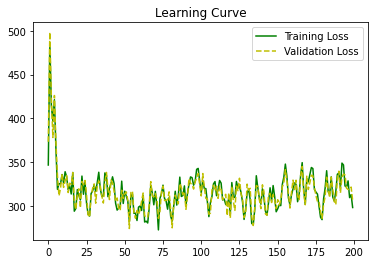

In [6]:
plt.plot(range(len(t)), t, 'g-', label='Training Loss')
plt.plot(range(len(v)), v, 'y--', label='Validation Loss')
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [7]:
model.weights_

array([22.73147704, -0.32022697,  0.34348513, -0.33589523,  0.48122996,
       -0.26862598,  1.37616879, -0.26294501, -0.12636268, -0.1840108 ,
       -0.36478389, -0.77820366,  0.39581462, -1.28426117])

Train:  (120, 1) Test:  (80, 1)


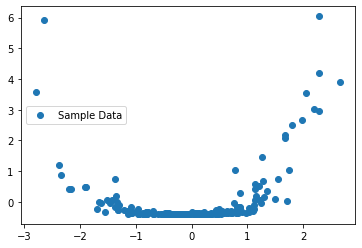

In [8]:
X, y = make_regression(n_samples=200, n_features=1, noise=20, bias=10, random_state=1)
X = normalize(X)
y = y ** 4

y_bar = np.mean(y)
y_std = np.std(y)

y = (y - y_bar) / y_std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print("Train: ", X_train.shape, "Test: ", X_test.shape)

plt.scatter(X, y, label='Sample Data')
plt.legend(loc='best')
plt.show()

In [9]:
model = LinearRegression(n_iters=100, degree=4, penalty='L2', C=1, eta=1e-5)

In [10]:
t, v = model.fit(X_train, y_train)

iteration: 100, loss: 0.22477676174463088, validation-loss: 0.13777345241074443


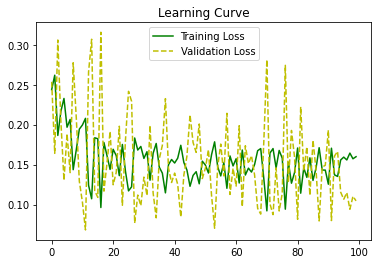

In [11]:
plt.plot(range(len(t)), t, 'g-', label='Training Loss')
plt.plot(range(len(v)), v, 'y--', label='Validation Loss')
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

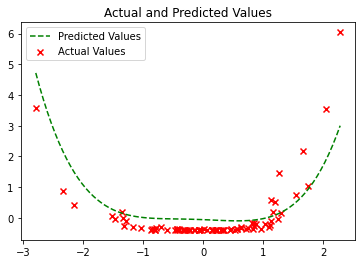

In [12]:
plt.scatter(X_test, y_test, marker='x', c='r', label='Actual Values')
plot_x = np.linspace(X_test.min(), X_test.max(), X_test.shape[0]).reshape(X_test.shape)
plt.plot(plot_x, model.predict(plot_x), 'g--', label='Predicted Values')
plt.title("Actual and Predicted Values")
plt.legend(loc='best')
plt.show()

In [13]:
model.weights_

array([-0.06019028, -0.07676794, -0.05127295,  0.05911681,  0.10274262])